**Data Wrangling - Otto Group product classification**

[What Python libraries we need?](#section1)

[Where is the dataset?](#section2)

[What does the data look like at first glance?](#section3)

[What are data types for the columns, how much data is there?](#section4)

[Can we summarize the data?](#section5)

[What about non numerical data?](#section6)

[Should any columns be deleted?](#section7)

[Should any columns be transformed?](#section8)

<a id='section1'></a>

#### What Python libraries we need?

In [53]:
# pandas gives high-performance, easy-to-use data structures and data analysis tools
import pandas as pd

# fundamental package for scientific computing
import numpy as np 

# matplotlib provides a MATLAB-like plotting framework
import matplotlib.pyplot as plt

# seaborn is visualization library based on matplotlib, 
# provides high level interface for drawing attractive statistical graphics
import seaborn as sns
sns.set_style(style='whitegrid')

<a id='section2'></a>

#### Where is the dataset?

In [90]:
# training data set
df = pd.read_csv('train.csv')

# test data set
df_test = pd.read_csv('test.csv')

<a id='section3'></a>

#### What does the data look like at first glance?

In [10]:
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [11]:
df_test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


The train data has 93 features, id and product category as columns. Test data is similar except for the product category column which needs to predicted.

<a id='section4'></a>

#### What are data types for the columns, how much data is there?

In [48]:
df.shape, df_test.shape

((61878, 94), (144368, 93))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144368 entries, 0 to 144367
Data columns (total 94 columns):
id         144368 non-null int64
feat_1     144368 non-null int64
feat_2     144368 non-null int64
feat_3     144368 non-null int64
feat_4     144368 non-null int64
feat_5     144368 non-null int64
feat_6     144368 non-null int64
feat_7     144368 non-null int64
feat_8     144368 non-null int64
feat_9     144368 non-null int64
feat_10    144368 non-null int64
feat_11    144368 non-null int64
feat_12    144368 non-null int64
feat_13    144368 non-null int64
feat_14    144368 non-null int64
feat_15    144368 non-null int64
feat_16    144368 non-null int64
feat_17    144368 non-null int64
feat_18    144368 non-null int64
feat_19    144368 non-null int64
feat_20    144368 non-null int64
feat_21    144368 non-null int64
feat_22    144368 non-null int64
feat_23    144368 non-null int64
feat_24    144368 non-null int64
feat_25    144368 non-null int64
feat_26    144368 non-null int6

Both train and test have 93 int columns. Train set have 1 object column for product category. It has value like "Class_1". There are no null values at all in the data.

<a id='section5'></a>

#### Can we summarize the data?

In [20]:
train_summary = df.describe()
train_summary

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [21]:
test_summary = df_test.describe()
test_summary

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,...,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000
mean,72184.500000,0.386201,0.263597,0.899819,0.780727,0.071498,0.026439,0.200169,0.667378,1.035271,...,0.074989,0.538485,1.128782,0.405249,0.875526,0.473284,0.814010,0.271161,0.388348,0.132675
std,41675.596169,1.468882,1.261908,2.949106,2.846181,0.428568,0.228354,1.069235,2.286832,3.548618,...,1.288595,1.906121,2.682511,1.631566,2.090288,1.617853,4.603653,2.073627,1.006935,1.302695
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36092.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72184.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,108276.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,144368.000000,64.000000,45.000000,84.000000,82.000000,14.000000,11.000000,44.000000,100.000000,47.000000,...,132.000000,56.000000,73.000000,54.000000,37.000000,62.000000,119.000000,74.000000,22.000000,91.000000


Since there are so many columns its hard to read summary data for all the columns. Train and test data looks similar which is good. Our well fitted model should work fine for the test data. We many need to visualize the data to get more insights. Let us transpose the summary dataframes to see the values for all the columns.

In [25]:
train_summary = train_summary.transpose()
train_summary

,count,mean,std,min,25%,50%,75%,max
id,61878.0,30939.500000,17862.784315,1.0,15470.25,30939.5,46408.75,61878.0
feat_1,61878.0,0.386680,1.525330,0.0,0.00,0.0,0.00,61.0
feat_2,61878.0,0.263066,1.252073,0.0,0.00,0.0,0.00,51.0
feat_3,61878.0,0.901467,2.934818,0.0,0.00,0.0,0.00,64.0
feat_4,61878.0,0.779081,2.788005,0.0,0.00,0.0,0.00,70.0
feat_5,61878.0,0.071043,0.438902,0.0,0.00,0.0,0.00,19.0
feat_6,61878.0,0.025696,0.215333,0.0,0.00,0.0,0.00,10.0
feat_7,61878.0,0.193704,1.030102,0.0,0.00,0.0,0.00,38.0
feat_8,61878.0,0.662433,2.255770,0.0,0.00,0.0,1.00,76.0
feat_9,61878.0,1.011296,3.474822,0.0,0.00,0.0,0.00,43.0


In [26]:
test_summary = test_summary.transpose()
test_summary

,count,mean,std,min,25%,50%,75%,max
id,144368.0,72184.500000,41675.596169,1.0,36092.75,72184.5,108276.25,144368.0
feat_1,144368.0,0.386201,1.468882,0.0,0.00,0.0,0.00,64.0
feat_2,144368.0,0.263597,1.261908,0.0,0.00,0.0,0.00,45.0
feat_3,144368.0,0.899819,2.949106,0.0,0.00,0.0,0.00,84.0
feat_4,144368.0,0.780727,2.846181,0.0,0.00,0.0,0.00,82.0
feat_5,144368.0,0.071498,0.428568,0.0,0.00,0.0,0.00,14.0
feat_6,144368.0,0.026439,0.228354,0.0,0.00,0.0,0.00,11.0
feat_7,144368.0,0.200169,1.069235,0.0,0.00,0.0,0.00,44.0
feat_8,144368.0,0.667378,2.286832,0.0,0.00,0.0,1.00,100.0
feat_9,144368.0,1.035271,3.548618,0.0,0.00,0.0,0.00,47.0


<a id='section6'></a>

#### What about non numerical data?

The only non numerical column is product category in train data set. Let us verify and see what are the 9 categories for the product.

In [28]:
df.target.unique()

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

<a id='section7'></a>

#### Should any columns be deleted?

In [44]:
# id column looks un-useful, delete it for train and test data sets
df.drop("id",axis=1,inplace=True,errors='ignore')
df_test.drop("id", axis=1,inplace=True,errors='ignore')

In [47]:
# verify
df.shape, df_test.shape

((61878, 94), (144368, 93))

<a id='section8'></a>

#### Should any columns be transformed?

In [57]:
# let us change the product category text into corresponding integers to make easy to handle and visualize the data
# but first keep original values aside

product_categories = columns = list(np.unique(df.target))
product_categories

['Class_1',
 'Class_2',
 'Class_3',
 'Class_4',
 'Class_5',
 'Class_6',
 'Class_7',
 'Class_8',
 'Class_9']

In [58]:
df.target = [ int(clas[-1]) for clas in df.target]
df.target.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Are there any outliers in the data?

To find out the outliers we need visualize the data.

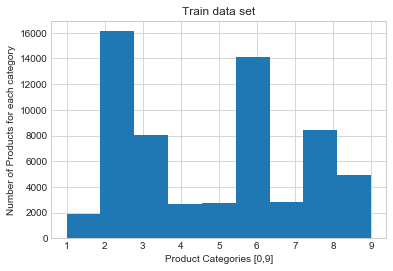

In [64]:
# counts for each target value
plt.hist(df.target,bins=9)
plt.title("Train data set")
plt.ylabel("Number of Products for each category")
plt.xlabel("Product Categories [0,9]")
plt.show()

Looks like there is some class imbalance. Class 2 and 6 seems to relatively very large from other classes. May these are more general product categories.

In [65]:
# numeric counts
from collections import Counter
Counter(df.target)

Counter({1: 1929,
         2: 16122,
         3: 8004,
         4: 2691,
         5: 2739,
         6: 14135,
         7: 2839,
         8: 8464,
         9: 4955})

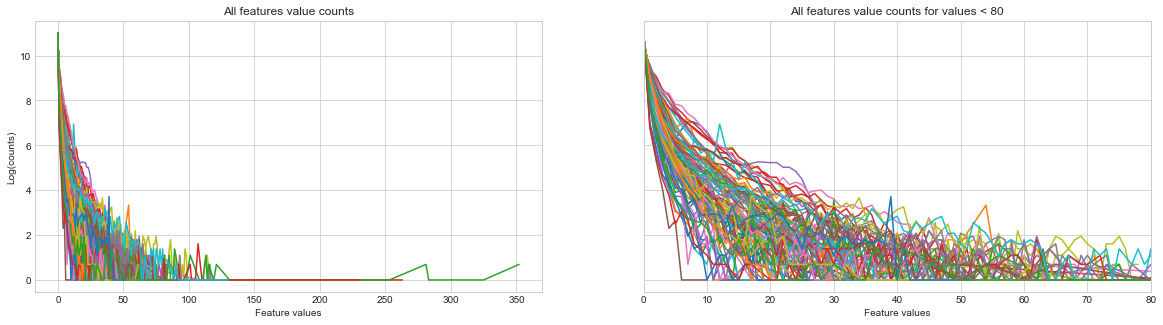

In [66]:
# to see outliers lets plot all the data

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(20,5)
num_of_features = 93

for i in  np.arange(1,num_of_features+1,1):
    data = df['feat_' + str(i)].value_counts()
    data.sort_index(inplace=True)
    ax1.set_ylabel("Log(counts)")
    ax1.set_xlabel("Feature values")
    ax1.set_title("All features value counts")
    ax1.plot(data.index,np.log(data.values))
    
    # looks like fewer values greater than 80 so zooming on other data
    data_reduced = data[0:80]
    ax2.set_title("All features value counts for values < 80")
    ax2.set_xlim(0,80)
    ax2.set_xlabel("Feature values")
    ax2.plot(data_reduced.index,np.log(data_reduced.values))
    
plt.show()

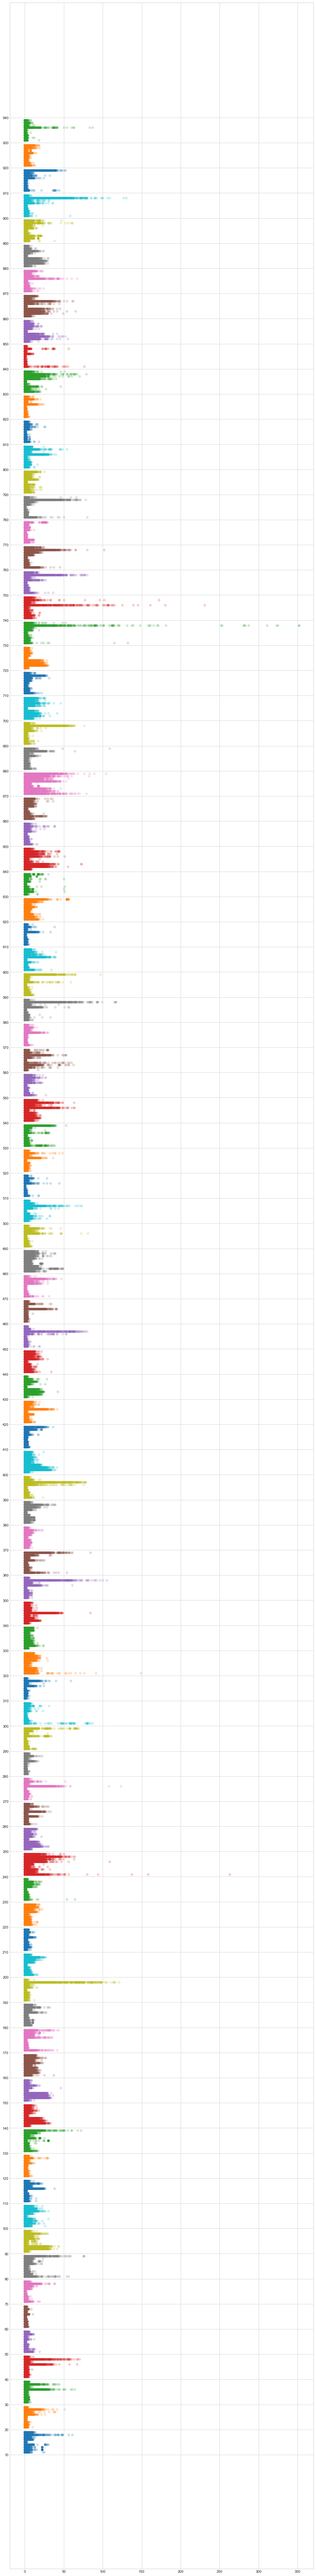

In [67]:
# check indivual values for each feature

plt.figure(figsize=(15,130))

for i in  np.arange(1,num_of_features+1,1):
    df['target_new'] = df['target']+10*i
    plt.scatter(df['feat_' + str(i)], df.target_new,alpha=0.2)

plt.yticks(np.arange(10, 950, step=10))
plt.show()

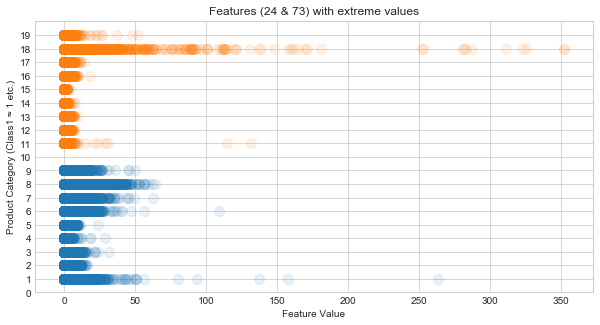

In [89]:
# following 2 features have relatively extreme values
plt.figure(figsize=(10,5))
plt.scatter(df['feat_24'], df.target,alpha=0.1,s=100)
plt.scatter(df['feat_73'], df.target+10,alpha=0.1,s=100)
plt.yticks(np.arange(0,20,1))
plt.ylabel("Product Category (Class1 ≈ 1 etc.)")
plt.xlabel("Feature Value")
plt.title("Features (24 & 73) with extreme values")
plt.show()